In [5]:
#importing neccesary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [6]:
hd_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data', header=None)

In [7]:
#check first 6 rows
hd_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


we notice that the column headers are not representative enough. This would make it difficult for interpretation, so to make it easier to know how to format the data, we'll replace the column header with column names.

- Age
- Sex
- cp, chest pain
- chot, serum cholesterol in mg/dl
- restecg, resting electrocardiographic results
- thalach, maximum heart rate achieved
- exang, exercise induded angina
- oldpeak, ST depression included by exercise relatige to rest 
- Slope, the slope of the peak exercise ST segment.
- ca, number of major vessels (0-3) colored by flouroscopy
- thal, this is short of thalium heart scan.
- hd, diagnosis of heart diseases, the predicted attribute

In [8]:
##### changing the column number to column names
hd_df.columns = ['age','sex','cp','restbp','chol',
                 'fbs','restecg','thalach','exang',
                 'oldpeak','slope','ca','thal','hd']

#printn first first 5 rows to check if columns names have changed
hd_df.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [10]:
hd_df.dtypes

age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
hd           int64
dtype: object

we observa that ca and thal are of type object which suggests a mixture of different data types

In [11]:
hd_df['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

In [12]:
hd_df['thal'].unique()

array(['6.0', '3.0', '7.0', '?'], dtype=object)

we observe that ca and thal have floats and question marks which suggest missing data, which we need to handle 

### Missing data 

Scikit learn's classification trees do not support datasets with missing values 

In [13]:
q_len=len(hd_df.loc[(hd_df['ca'] == '?')|
          (hd_df['thal'] == '?')])

In [14]:
print('number of items with missing values: ' + str(q_len))

number of items with missing values: 6


we observe that 6 rows/ items have question mark ?b

In [15]:
#checking 6 values data contain '?'
hd_df.loc[(hd_df['ca'] == '?') |
         (hd_df['thal'] == '?')]

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [16]:
df_len = len(hd_df)

In [17]:
per_MV = (q_len/ df_len) *100
per_MV

1.9801980198019802

The amont of missing value is insignifant with just 1.9%, thus we can ignore it

We proceed to move to select the columns with no missing rows and store them in the dataframe

In [18]:
#we subset the clean data with no question marks and store it in a new df
df_clean = hd_df.loc[(hd_df['ca'] != '?') &
                    (hd_df['thal'] != '?')]

In [19]:
#we check the len of the orginal dataframe and subset
print(df_len)
len(df_clean)

303


297

we observe that there's a difference between both data is 6 from per_MV

In [20]:
# cehcking to verify if they're still any missing values
df_clean['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0'], dtype=object)

In [21]:
df_clean['thal'].unique()

array(['6.0', '3.0', '7.0'], dtype=object)

### split data into target and feature

In [22]:
## Make a new copy of the columns used to make predictions
X = df_clean.drop('hd', axis=1).copy()  # y = df_clean.iloc[:,:-1] 
X.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0


In [23]:
#make a new copy of the target column
y = df_clean['hd'].copy()  
y.head()

0    0
1    2
2    1
3    0
4    0
Name: hd, dtype: int64

#### Data types and format for encoding
- age	Feature	Discrete	
- sex	Feature	Categorical	
    - 0 = female
    - 1 = male
- cp	Feature	Categorical	
- restbps	Feature	Discrete	resting blood pressure (on admission to     the hospital)	mm Hg
- chol	Feature	Discrete	serum cholestoral
- fbs	Feature	Categorical	fasting blood sugar > 120 mg/dl
    - 0 = >=120mg/dl
    - 1 = <120mg/dl

- restecg	Feature	Categorical
    - 1 = normal
    - 2 = having ST-T wave abnormally
    - 3 = shwoing probable or definite left ventricular hypertrophy
- thalach	Feature	Discrete	maximum heart rate achieved
    - 0 = no
    - 1 = yes
    
- exang	Feature	Categorical	exercise induced angina
- oldpeak	Feature	Discrete	ST depression induced by exercise           relative to rest
- slope	Feature	Categorical
    - 1= upsloping
    - 2 = flat
    - 3 = downsloping
- ca	Feature	Discrete	number of major vessels (0-3) colored by       flourosopy
- thal	Feature	Categorical
    - 3 = normal (no cold spots)
    - 6 = fixed defect (cold spots during rest and exercise)
    - 7 = reversible defect (when spots only appear during exercise)
- num	Target	Discrete	diagnosis of heart disease

from source : https://archive-beta.ics.uci.edu/dataset/45/heart+disease

In [24]:
#lets check for datatypes in X
X.dtypes

age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
dtype: object

Age, restbp, chol and thalach are all float64 which is correct but we
would like to change some of categorical values to numerical because 
`scikit learn doesnot support categorical data.

In [25]:
#lets start by inspecting columns types to determine which ones need to be
#converted to categorical
X['cp'].unique()

array([1., 4., 3., 2.])

In [26]:
# use get dummmies for pandas for one hot encoding
pd.get_dummies(X, columns=['cp']).head()

,age,sex,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,cp_1.0,cp_2.0,cp_3.0,cp_4.0
0,63.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,True,False,False,False
1,67.0,1.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,False,False,False,True
2,67.0,1.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,False,False,False,True
3,37.0,1.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,False,False,True,False
4,41.0,0.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,False,True,False,False


In [27]:
X_encoded = pd.get_dummies(X, columns=['cp','restecg','slope','thal'])

X_encoded.head()

,age,sex,restbp,chol,fbs,thalach,exang,oldpeak,ca,cp_1.0,...,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,True,...,False,False,False,True,False,False,True,False,True,False
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,False,...,True,False,False,True,False,True,False,True,False,False
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,False,...,True,False,False,True,False,True,False,False,False,True
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,False,...,False,True,False,False,False,False,True,True,False,False
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,False,...,False,False,False,True,True,False,False,True,False,False


In [28]:
# lets check for the target variable to verify its category
y.unique()

array([0, 2, 1, 3, 4])

we see that the 5 levels however we're only interested in the case when 
the individual has or does not have heart disease

In [29]:
y_not_zero = y > 0 # get the index of each non-zero value in y
y[y_not_zero] = 1 #setting each non-zero value in y to 1
y.unique()

array([0, 1])

#### Preliminary Classification Tree

In [30]:
# Split the data into training and testing data

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=42)

# create a decision tree and fit it to the training data
clf_dt = DecisionTreeClassifier(random_state=42)
clf_dt = clf_dt.fit(X_train, y_train)

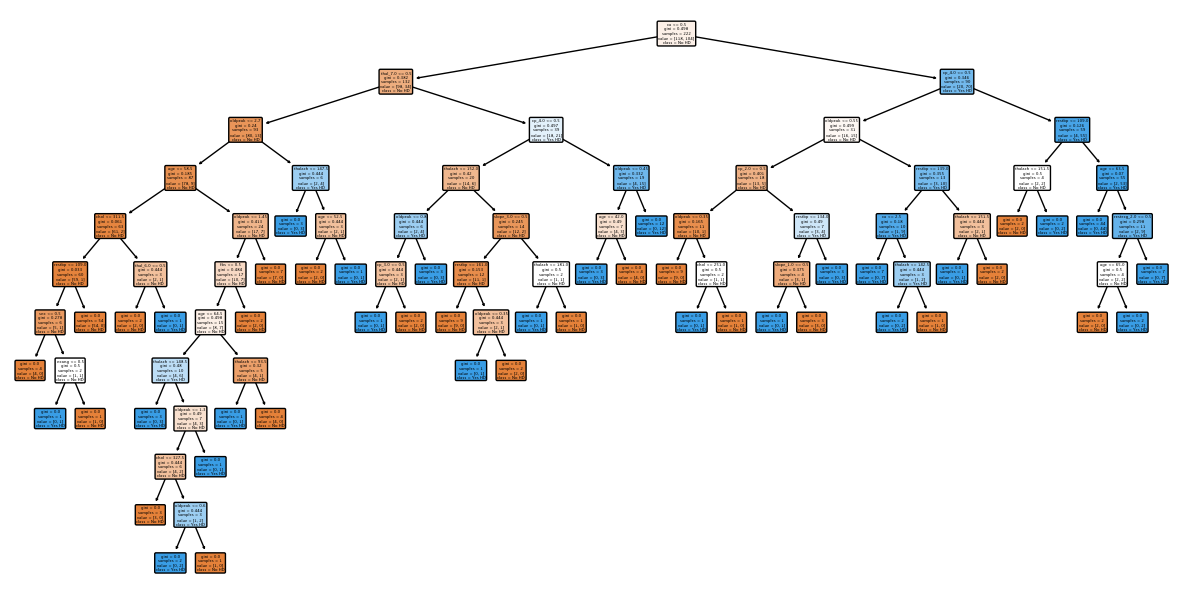

In [31]:
##  We can plot the tree and it is huge!
plt.figure(figsize=(15,7.5))
plot_tree(clf_dt,
         filled=True,
         rounded=True,
         class_names=["No HD","Yes HD"],
         feature_names=X_encoded.columns);

ok, we've built a classification Tree and we notice that the tree is huge.
We would proceed to draw a classification Matrix

In [32]:
# Plot confusion_matrix() will run the test data down the tree and draw
y_pred = clf_dt.predict(X_test)

In [33]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

In [34]:
# Create ConfusionMatrixDisplay object
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Does not have HD", "Has HD"])

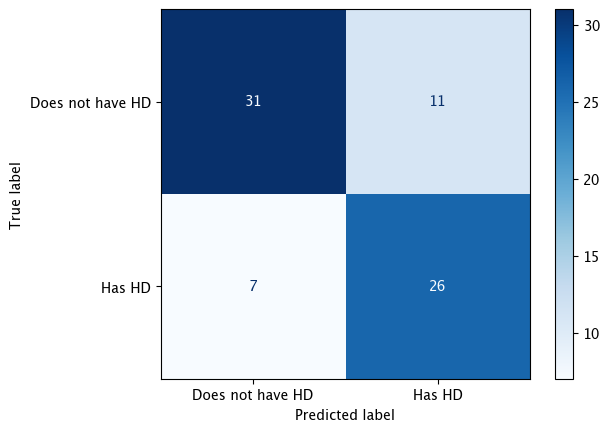

In [35]:
# Plot confusion matrix
cmd.plot(cmap=plt.cm.Blues)

# Show plot
plt.show()

In the confusion matrix, we see that 31 + 11 = 42 people that did not have
Heart Disease, 31 (74%) were correctly classified. 

#### Cost complexity pruning part 1: Visualize alpha

Decision trees are notorious for being overfit to training dataset, and
a lot of parameters like max_depth and min_samples, that are designed to 
reduce overfitting. However, pruning a tree with cost complexity prunning 
can simplify the whole process of finding a smaller tree that improves the 
accuracy with the Testing Dataset.

Pruning a decision tree is all about finding the value for the pruning 
parameter, alpha, which controls how little or how much pruning happens.
One way to find the optimal value for alpha is plot the accuracy of the tree
as a function of different values.We'll do this for both the Training Database
and the Testing Dataset.

In [36]:
path = clf_dt.cost_complexity_pruning_path(X_train, y_train) #determine the values of alpha
ccp_alphas = path.ccp_alphas #extract different values of alpha
ccp_alphas = ccp_alphas[:-1] #exclude the maximum value for alpha

clf_dts = [] # crrate an array that we will put decision tres into

## now create one decision tree per value for alpha and store it in the array
for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf_dt.fit(X_train, y_train)
    clf_dts.append(clf_dt)

Now let's graph the accuracy of the trees using the Training Dataset and the
Testing Dataset as function of alpha.

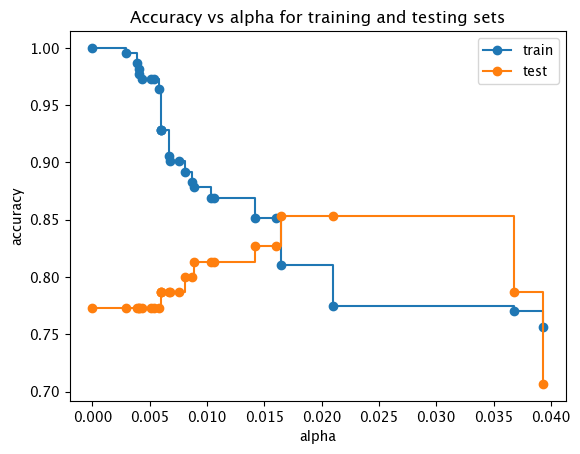

In [37]:
train_scores = [clf_dt.score(X_train, y_train) for clf_dt in clf_dts]
test_scores = [clf_dt.score(X_test, y_test) for clf_dt in clf_dts]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label='train', drawstyle='steps-post')
ax.plot(ccp_alphas, test_scores, marker='o', label='test', drawstyle='steps-post')
ax.legend()
plt.show()

In the graph above, we see that accuracy for the Testing Dataset hits its
maximum value when alpha is about 0.016. After this value for alpha, the
accuracy of the Training Dataset drops and that suggests we should set ccp_alpha=0.016

NOTE: When we apply Cost complexity Pruning to a Classification Tree, value
for alpha go from 0 to 1, because GINI scores go from 0 to 1. In contrast, values
for alpha for a Regression Tree can be much larger since the sum of squared
residuals can, in theory can, in theory. go from 0 to positive inifinity.

Since there are many ways we could have divided the original dataset into 
Training and Testing datasets, how do we know we used the best Training 
Dataset and how do we know we used the best Testing Dataset? Typically,
we answer this question with 10-Fold Cross Validation. So that's what we're 
going to do now, and we'll do it with the cross_val_score() function

Cost Complexity Pruning Part 2: Cross Validation for Finding the Best Alpha

The graph above suggests one value for alpha, 0.016, but another set of data might suggest another optimal value.

First let's demonstrate that different training and testing datasets result in
trees with different accuracies when we set ccp_alpha=0.016. We will do
this by using the cross_val_score() function to generate different training
and testing datasets and then train and test the tree with those datasets

In [38]:
import matplotlib
matplotlib.use('TkAgg')

In [39]:
clf_dt = DecisionTreeClassifier(random_state=42, ccp_alpha=0.016) # create the tree with ccp_alpha = 0.016

## now use 5-fold cross validation create 5 different training and testing datasets 
## that are then used to train and test the tree.
## NOTE: we use 5-fold because we don't have tons of data..
scores= cross_val_score(clf_dt,X_train, y_train, cv=5)
df = pd.DataFrame(data={'tree':range(5),'accuracy':scores})

In [ ]:
pd.options.plotting.backend = "plotly"
df.plot(x='tree', y='accuracy',)

This graph above illustrates that using Training and Testing data with the same alpha resulted in 
different accuracies suggesting that alpha is sensitive to the datasets. SO instead of picking 
a single Training dataset and single Testing dataset, let's use cross validation to find the optimal
value of ccp_alpha.

In [ ]:
# create an array to store the results at each fold during cross validation
alpha_loop_values = []

## for each candidate value for alpha we will run 5-fold cross validation
## Then we will store the mean and standard deviation of the scores (the accuracy for each sell)
## To cross_val_score in alpha_loop_values...

for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    stores = cross_val_score(clf_dt, X_train, y_train, cv=5)
    alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])
    
## Now we can draw a graph of the means and standard deviation of the scores
## for each candidate value for alpha

alpha_results = pd.DataFrame(alpha_loop_values,
                            columns=['alpha', 'mean_accuracy','std'])

alpha_results.plot(x='alpha', y='mean_accuracy')

In [ ]:
alpha_results[(alpha_results['alpha'] > 0.014)
             &
             (alpha_results['alpha'] < 0.015)]

Now let's store the ideal value to alpha that we can use it to build the best tree

In [ ]:
ideal_ccp_alpha = alpha_results[(alpha_results['alpha'] > 0.014)
             &
             (alpha_results['alpha'] < 0.015)]['alpha']


ideal_ccp_alpha

In [ ]:
# conver ideal_ccp_alpha to float
ideal_ccp_alpha = float(ideal_ccp_alpha)
ideal_ccp_alpha

#### Building, evaluating, drawing, and interpreting the final classification Tree

In [ ]:
## Build and train a new decision tree,
clf_dt_pruned = DecisionTreeClassifier(random_state=42,
                                      ccp_alpha=ideal_ccp_alpha)

clf_dt_pruned = clf_dt_pruned.fit(X_train, y_train)

Now we'll draw another confusion matrix to see if the pruned tree does better,

In [ ]:
# Plot confusion_matrix() will run the test data down the tree and draw
y_pred_pruned = clf_dt_pruned.predict(X_test)

# Compute confusion matrix
cm_pruned = confusion_matrix(y_test, y_pred)

# Create ConfusionMatrixDisplay object
cmd_pruned = ConfusionMatrixDisplay(confusion_matrix=cm_pruned, display_labels=["Does not have HD", "Has HD"])

In [47]:
# Plot confusion matrix
cmd_pruned.plot(cmap=plt.cm.Blues)

# Show plot
plt.show()